<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Bokeh-Version" data-toc-modified-id="Bokeh-Version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bokeh Version</a></span></li><li><span><a href="#HoloViews" data-toc-modified-id="HoloViews-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>HoloViews</a></span><ul class="toc-item"><li><span><a href="#Declaring-data" data-toc-modified-id="Declaring-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Declaring data</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></div>

# Bokeh Version

In [1]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:

from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment
import pandas as pd


In [3]:
palette.reverse()

In [4]:
counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

In [5]:
len(counties)

254

In [6]:
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties ]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

In [7]:
TOOLS = "pan,wheel_zoom,reset,hover,save"

In [8]:
p = figure(title="Texas Unemployment, 2009", tools=TOOLS,
           x_axis_location=None, y_axis_location=None)

In [9]:
p.grid.grid_line_color = None

In [10]:
p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

GlyphRenderer(id='ff25454c-5c58-49f8-a35d-812cce9efd26', ...)

In [11]:
hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

In [12]:
show(p)

# HoloViews


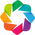

In [13]:
import holoviews as hv
hv.extension('bokeh')
#hv.notebook_extension()

## Declaring data

In [14]:
counties = [dict(county, Unemployment=unemployment[cid])
            for cid, county in counties.items()
            if county["state"] == "tx"]

choropleth = hv.Polygons(counties, ['lons', 'lats'], [('detailed name', 'County'), 'Unemployment'])

## Plot

In [15]:
plot_opts = dict(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                 show_grid=False, show_frame=False, width=500, height=500,
                 color_index='Unemployment', colorbar=True, toolbar='above')

In [16]:
style = dict(line_color='white')

In [17]:
choropleth.opts(style=style, plot=plot_opts)

:Polygons   [lons,lats]   (detailed name,Unemployment)

In [18]:
%load_ext version_information
%version_information bokeh, pandas, numpy

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
bokeh 0.12.13
pandas 0.22.0
numpy 1.13.3
Mon Jan 08 20:39:24 2018 CST